<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#微積分" data-toc-modified-id="微積分-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>微積分</a></span><ul class="toc-item"><li><span><a href="#ソフトマックス関数の概形(15点)" data-toc-modified-id="ソフトマックス関数の概形(15点)-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>ソフトマックス関数の概形(15点)</a></span></li><li><span><a href="#3D関数のプロット(15点)" data-toc-modified-id="3D関数のプロット(15点)-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>3D関数のプロット(15点)</a></span></li></ul></li><li><span><a href="#線形代数" data-toc-modified-id="線形代数-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>線形代数</a></span><ul class="toc-item"><li><span><a href="#線形結合の確認(p.173,-5-39)(15点)" data-toc-modified-id="線形結合の確認(p.173,-5-39)(15点)-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>線形結合の確認(p.173, 5-39)(15点)</a></span></li><li><span><a href="#解析解の確認(p.177,-5-60)(15点)" data-toc-modified-id="解析解の確認(p.177,-5-60)(15点)-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>解析解の確認(p.177, 5-60)(15点)</a></span></li></ul></li><li><span><a href="#センター試験原題(10点)" data-toc-modified-id="センター試験原題(10点)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>センター試験原題(10点)</a></span></li><li><span><a href="#数値改変(30点)" data-toc-modified-id="数値改変(30点)-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>数値改変(30点)</a></span></li></ul></div>

<div style="text-align: center;">
   <font size="5"> 2020年度　数式処理演習　pair試験問題 </font>
</div>
   <div style="text-align: right;">
   <font size="3"> cc by Shigeto R. Nishitani, 2020/11/26 実施 </font>
</div>

* file: ~/symboic_math/exams/20_pre_ans.ipynb

以下の問題をpythonで解き，LUNAへ提出せよ．LUNAへはipynbとpdf形式の２種類を提出すること．

# 微積分
## ソフトマックス関数の概形(15点)
ソフトマックス関数
    \begin{equation*}
      f(x) = \frac{1}{1+e^{-x}}
    \end{equation*}
    の増減，極値，凹凸を調べ，曲線$y=f(x)$の概形を描け．

In [1]:
from sympy import *
x, y  = symbols('x y')

f = 1/(1+exp(-x))
f

1/(1 + exp(-x))

In [2]:
df = f.diff(x)
df

exp(-x)/(1 + exp(-x))**2

In [3]:
df2 = f.diff(x,x)
df2

(-1 + 2*exp(-x)/(1 + exp(-x)))*exp(-x)/(1 + exp(-x))**2

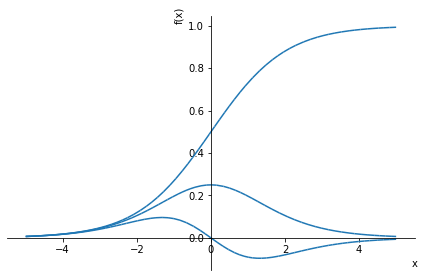

In [4]:
%matplotlib inline

plot(f,df,df2,(x,-5,5))

In [5]:
solve(df,x)

[]

In [6]:
solve(df2,x)

[0]

|  x | $-\infty$ | $\cdots$   |  0  |   $\cdots$   | $\infty$ |
| ---- | ----  | ---- | ---- | ---- | ---- |
|  f(x) | 0 | $\nearrow$  |    0.5  |   $\nearrow$  | 0 |
|  f'(x) | 0 |  +  |    +  |  +  |   0 |
|  f''(x) | 0 |  +  |  0  |  -  |  0  

## 3D関数のプロット(15点)

３変数のシグモイド関数で，１変数を固定すると次のような関数となる．
``` python
import numpy as np

def softmax(x,y):
    return np.exp(-x)/(np.exp(-x)+np.exp(-y)+np.exp(-1))
```

この関数を
``` python
x = np.arange(-4, 4, 0.5)
y = np.arange(-4, 4, 0.5)
```
で３次元プロットせよ．

In [7]:
import numpy as np

def softmax(x,y):
    return np.exp(-x)/(np.exp(-x)+np.exp(-y)+np.exp(-1))

In [8]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

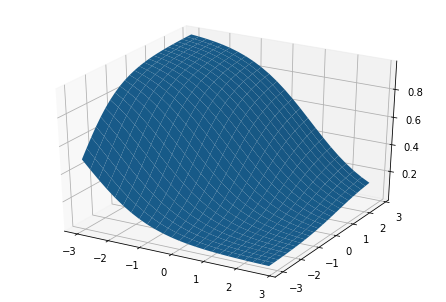

In [9]:
%matplotlib inline

x = np.arange(-3, 3, 0.25)
y = np.arange(-3, 3, 0.25)
X, Y = np.meshgrid(x, y)
Z1 = softmax(X,Y)


fig = plt.figure()
plot3d = Axes3D(fig)
plot3d.plot_surface(X,Y,Z1) 


plt.show()

# 線形代数
## 線形結合の確認(p.173, 5-39)(15点)

sympyを使って，$w^T x$で線形結合が得られることを確認せよ．
1. $ w=\left(\begin{array}c w_0\\w_1\\w_2\end{array}\right)$, $ x=\left(\begin{array}c x_0\\x_1\\x_2\end{array}\right)$を作る．
1. wを転置する
1. `ww.T*xx`で線形結合となることを確認する．
1. `ww*xx.T`では3x3の行列が得られることも確認せよ．

In [10]:
from sympy import *
w0,w1,w2  = symbols('w0,w1,w2')
x0,x1,x2  = symbols('x0,x1,x2')

ww = Matrix([w0,w1,w2])
xx = Matrix([x0,x1,x2])
ww

Matrix([
[w0],
[w1],
[w2]])

In [11]:
ww.T*xx

Matrix([[w0*x0 + w1*x1 + w2*x2]])

In [12]:
ww*xx.T

Matrix([
[w0*x0, w0*x1, w0*x2],
[w1*x0, w1*x1, w1*x2],
[w2*x0, w2*x1, w2*x2]])

## 解析解の確認(p.177, 5-60)(15点)

``` python
xdata=np.array([1,2,3,4])
ydata=np.array([0,5,15,24])
```
を対象データとして，(5-53)にしたがって，N=4, n=3で
$$
y=a_0 + a_1\,x +a_2\, x^2
$$
に対するfittingを行う．得られたデザイン行列$X$は
$$X=\left(
\begin{array}{@{\,}ccc@{\,}}
1 & 1 & 1\\
1 & 2 & 4\\
1 & 3 & 9\\
1 & 4 & 16\\\end{array}
\right)$$
となる．(5-59)式の左辺の$X^TX$が3x3行列になることを確認せよ．

ヒント：https://nbviewer.jupyter.org/github/daddygongon/jupyter_num_calc/blob/master/numerical_calc/least_square_fit.ipynb
の「正規方程式(Normal Equations)による解」の「python codeによる具体例」を参照せよ．

In [13]:
import numpy as np
from pprint import pprint
import scipy.linalg as linalg

X = Matrix([[ 1.,  1.,  1.],
       [ 1.,  2.,  4.],
       [ 1.,  3.,  9.],
       [ 1.,  4., 16.]])

np.dot(X.T,X).shape

(3, 3)

# センター試験原題(10点)
(2018大学入試センター試験　追試験 数学II・B 第2問)

$a$ を正の実数とし，
放物線$y=3x^2$ を$C_1$,
放物線$y=2x^2+a^2$ を$C_2$ とする．
$C_1$ と$C_2$ の二つの共有点を $x$ 座標の小さい順にA,Bとする．
また，$C_1$ と$C_2$ の両方に第1象限で接する直線を$l$ とする．

(1) Bの座標を$a$ を用いて表すと
$(\fbox{ ア }\,, \fbox{ イ }\,a^{ \fbox{ ウ }})$
である


In [14]:
from sympy import *
a, s, t, x = symbols('a, s, t, x')

In [15]:
yC1 = 3*x**2
yC1

3*x**2

In [16]:
yC2 = 2*x**2+a**2
yC2

a**2 + 2*x**2

In [17]:
eq = yC1 - yC2

In [18]:
xB = solve(eq,x)[1]
xB

a

In [19]:
yC2.subs({x:xB})

3*a**2

直線$l$ と二つの放物線$C_1, C_2$ の接点の$x$ 座標をそれぞれ$s,t$ とおく．
$l$ は$x=s$ で$C_1$ と接するので，$l$ の方程式は
\begin{equation*}
  y = \fbox{ エ }\,sx - \fbox{ オ }\,s^{ \fbox{ カ }}
\end{equation*}
と表せる．
同様に，$l$ は$x=t$ で$C_2$ と接するので，$l$ の方程式は
\begin{equation*}
  y = \fbox{ キ }\,tx - \fbox{ ク }\,t^{ \fbox{ カ }} + a^2
\end{equation*}
とも表せる．これらにより，$s,t$ は
\begin{equation*}
  s = \frac{\sqrt{\fbox{ ケ }}}{\fbox{ コ }}a , \,\,\,\, 
t= \frac{\sqrt{\fbox{ ケ }}}{\fbox{ サ }}a 
\end{equation*}
である．

In [20]:
m1 = diff(yC1)

In [21]:
#y - y0 = m*(x-x0)
yl1 = m1.subs({x:s})*(x-s)+yC1.subs({x:s})

In [22]:
yl1.expand()

-3*s**2 + 6*s*x

In [23]:
m2 = diff(yC2,x)
yl2 = m2.subs({x:t})*(x-t)+yC2.subs({x:t})

In [24]:
yl2.expand()

a**2 - 2*t**2 + 4*t*x

In [25]:
t0=solve(m1.subs({x:s})-m2.subs({x:t}),t)[0]
t0

3*s/2

In [26]:
s0=solve((yl1-yl2).subs({x:0}).subs({t:t0}),s)[1]
s0

sqrt(6)*a/3

In [27]:
t0.subs({s:s0})

sqrt(6)*a/2

放物線$C_1$ の$s \leqq x \leqq {\fbox{ ア }}$ の部分
放物線$C_2$ の${\fbox{ ア }} \leqq x \leqq t$ の部分,
$x$ 軸，
および2直線$x=s, x=t$で囲まれた図形の面積は
\begin{equation*}
  \frac{\fbox{ シ }\sqrt{\fbox{ ス }}-\fbox{ セ }}{\fbox{ ソ }}a^{\fbox{ タ }}
\end{equation*}
である．

In [28]:
SS=integrate(yC1,(x,s,a))+integrate(yC2,(x,a,t))

In [29]:
together(SS.subs({t:t0}).subs({s:s0}))

a**3*(-6 + 7*sqrt(6))/9

# 数値改変(30点)

問3.において，放物線$C_1$ が
$$
y = 2.9 x^2
$$
である場合について解きなさい．
ただし，係数が浮動小数点数に変わったので，$\fbox{ ア }\,, \fbox{ イ }$などには浮動小数点数が入る．最後の図形の面積は，$1.284186\ldots a^3$ となる．(30点)

In [30]:
from sympy import *
a, s, t, x = symbols('a, s, t, x')

In [31]:
yC1 = 2.9*x**2
yC1

2.9*x**2

In [32]:
yC2 = 2*x**2+a**2
yC2

a**2 + 2*x**2

In [33]:
eq = yC1 - yC2

In [34]:
xB = solve(eq,x)[1]
xB

1.05409255338946*a

In [35]:
yC2.subs({x:xB})

3.22222222222222*a**2

In [36]:
m1 = diff(yC1)

In [37]:
#y - y0 = m*(x-x0)
yl1 = m1.subs({x:s})*(x-s)+yC1.subs({x:s})

In [38]:
yl1.expand()

-2.9*s**2 + 5.8*s*x

In [39]:
m2 = diff(yC2,x)
yl2 = m2.subs({x:t})*(x-t)+yC2.subs({x:t})

In [40]:
yl2.expand()

a**2 - 2*t**2 + 4*t*x

In [41]:
t0=solve(m1.subs({x:s})-m2.subs({x:t}),t)[0]
t0

1.45*s

In [42]:
s0=solve((yl1-yl2).subs({x:0}).subs({t:t0}),s)[1]
s0

0.875376219064817*a

In [43]:
t0.subs({s:s0})

1.26929551764398*a

In [44]:
SS=integrate(yC1,(x,s,a))+integrate(yC2,(x,a,t))

In [45]:
together(SS.subs({t:t0}).subs({s:s0}))

1.28418609654692*a**3

In [46]:
(-6+7*sqrt(6.0))/9

1.23849202216469